# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [297]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [245]:

sinasc['munResLat'] = sinasc['munResLat'].astype(float)
si1= sinasc[['munResLat']]
def categorizar_faixa(lat):
    if lat > -10.5:
        return 'acima de -10.5'
    else:
        return 'abaixo ou igual a -10.5'


si1.loc[:, 'faixa'] = si1['munResLat'].apply(categorizar_faixa)


mmm = si1.groupby('faixa').agg(['min', 'median', 'max','sum','std' ])

estatisticas = sinasc.groupby('faixa').agg({
    'IDADEMAE': ['std', 'var'],
    'QTDFILVIVO': ['std', 'var']
})

C:\Users\gerar\AppData\Local\Temp\ipykernel_10816\1620817474.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  si1.loc[:, 'faixa'] = si1['munResLat'].apply(categorizar_faixa)


In [247]:
mmm

munResLat                                            
                              min    median       max           sum       std
faixa                                                                        
abaixo ou igual a -10.5 -13.49976 -11.52855 -10.56842 -150874.73529  0.738864
acima de -10.5          -10.43595  -8.76889  -8.76889 -129611.14031  0.639948

In [241]:
estatisticas

IDADEMAE            QTDFILVIVO          
                     std        var        std       var
faixa2                                                  
abaixo de 3000  6.305013  39.753192   1.075338  1.156352
acima de 3000   6.405497  41.030387   1.191750  1.420268

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [239]:

def cat(lat):
    if lat > 3000:
        return "acima de 3000"
    else:
        return "abaixo de 3000"


sinasc['faixa2'] = sinasc['munResArea'].apply(cat)

sinasc['faixa2'].value_counts()

estatisticas = sinasc.groupby('faixa2').agg({
    'IDADEMAE': ['std', 'var'],
    'QTDFILVIVO': ['std', 'var']
})

sinasc.groupby('faixa2')['munResArea'].agg(['min','median','mean' ,'max','sum', 'std'])



,min,median,mean,max,sum,std
faixa2,,,,,,
abaixo de 3000,459.978,1758.465,1851.921453,2944.128,9.665178e+06,709.884005
acima de 3000,3029.189,10959.767,17778.218601,34096.394,3.877074e+08,13554.195564


In [237]:
estatisticas

IDADEMAE            QTDFILVIVO          
                     std        var        std       var
faixa2                                                  
abaixo de 3000  6.305013  39.753192   1.075338  1.156352
acima de 3000   6.405497  41.030387   1.191750  1.420268

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [289]:
sinasc.head(1)


def cc(alt):
    if alt > 300:
        return "maior que 300res"
    else:
        return "menor que 300res"

sinasc['faixa3'] = sinasc['munResAlt'].apply(cc)

sinasc.groupby('faixa3')['munResAlt'].agg(['min','mean','max','median','sum','std'])



estatisticas = sinasc.groupby('faixa2').agg({
    'IDADEMAE': ['std', 'var'],
    'QTDFILVIVO': ['std', 'var']
})

estatisticas


IDADEMAE            QTDFILVIVO          
                     std        var        std       var
faixa2                                                  
abaixo de 3000  6.305013  39.753192   1.075338  1.156352
acima de 3000   6.405497  41.030387   1.191750  1.420268

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


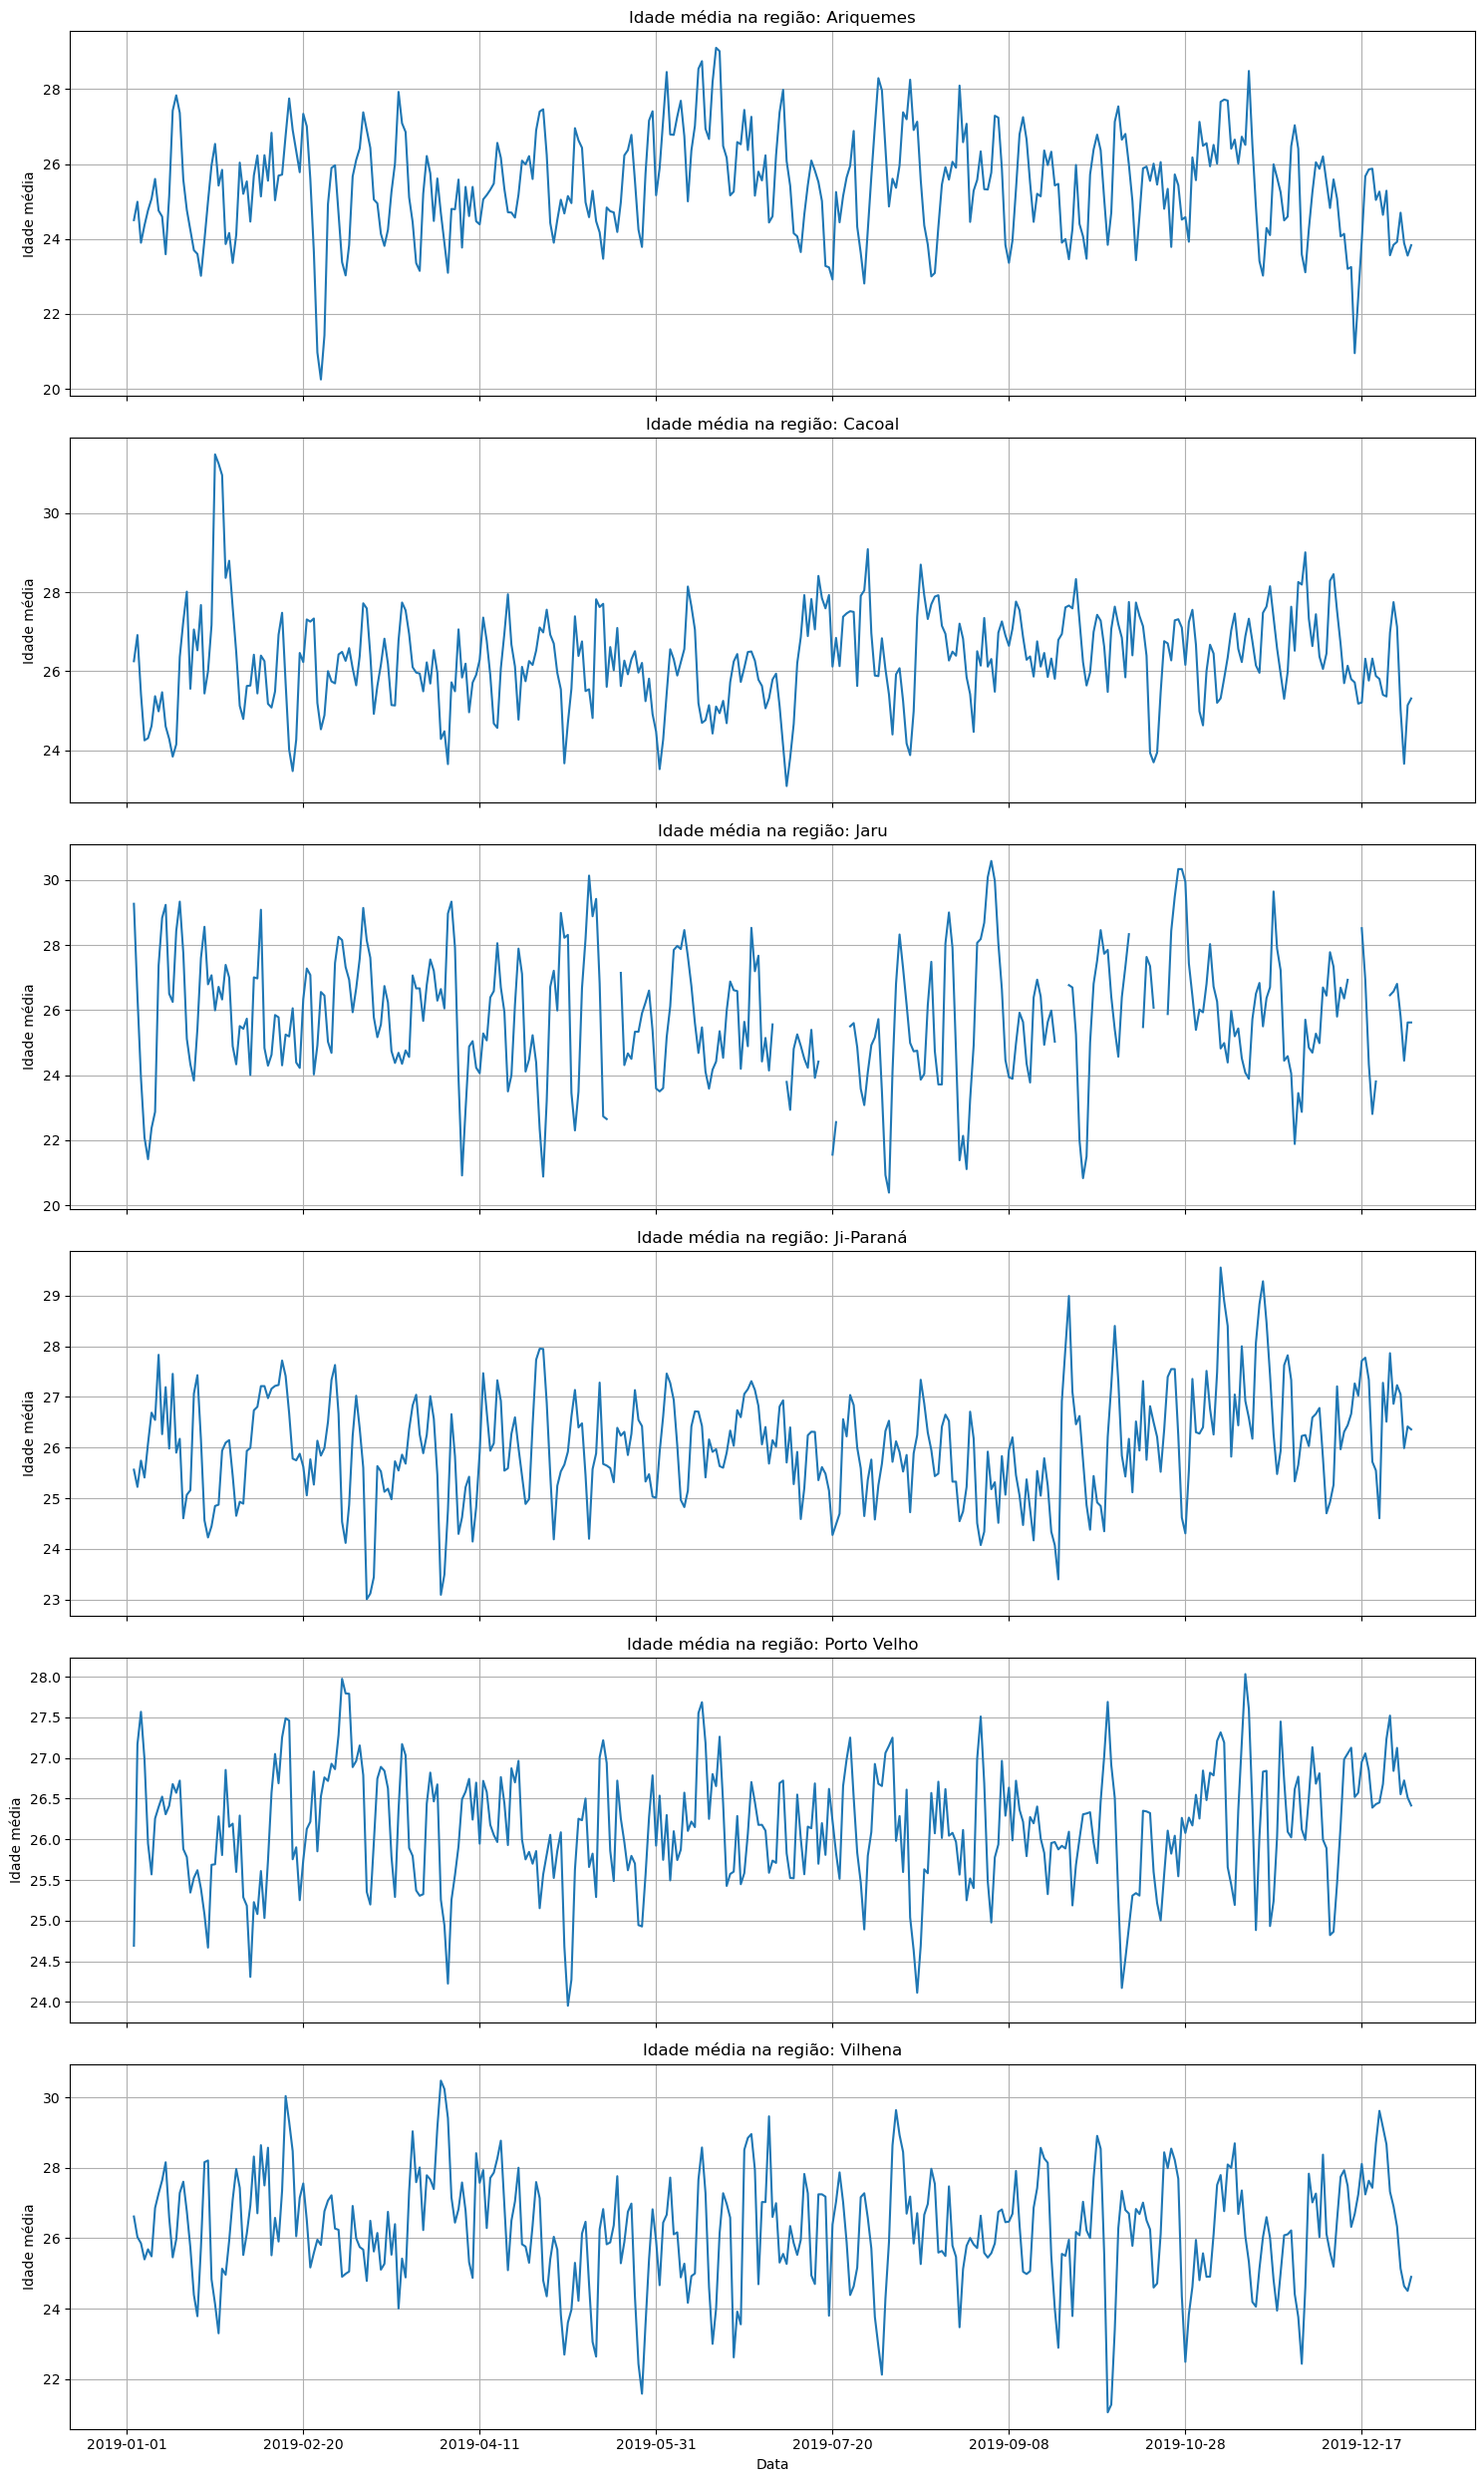

In [466]:

imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

import matplotlib.pyplot as plt

sinasc['regiao_imediata'] = sinasc['munResNome'].map(imediatas)

idade_media_por_regiao = sinasc.groupby(['DTNASC', 'regiao_imediata'])['IDADEMAE'].mean().unstack()


idade_media_por_regiao_movel = idade_media_por_regiao.rolling(window=3).mean()

fig, axes = plt.subplots(nrows=len(idade_media_por_regiao.columns), ncols=1, figsize=(15, 25), sharex=True)

for ax, (regiao, dados) in zip(axes, idade_media_por_regiao_movel.items()):
    dados.plot(ax=ax)
    ax.set_title(f'Idade média na região: {regiao}')
    ax.set_ylabel('Idade média')
    ax.grid(True)

plt.xlabel('Data')
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


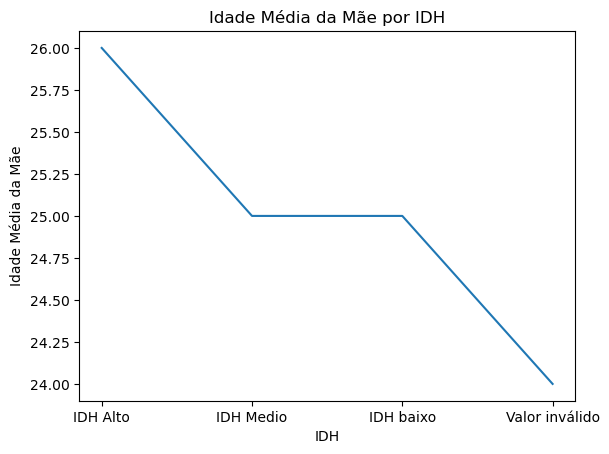

In [464]:


dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['idh']))
regioes_map


sinasc['IDH'] = sinasc['munResNome'].map(regioes_map)

sinasc.head()


sinasc.groupby('regiao_imediata')[['IDADEMAE','IDH']].agg(['mean','max'])

sinasc_copy = sinasc.copy()
sinasc_copy['IDH'] = sinasc_copy['IDH'].astype(float)

def classificar_idh(idh):
    if idh < 0.500:
        return 'IDH muito Baixo'
    elif 0.501 <= idh < 0.598:
        return 'IDH baixo'
    elif 0.599 <= idh < 0.698:
        return 'IDH Medio'
    elif 0.699 <= idh < 0.798:
        return 'IDH Alto'
    elif idh >= 0.799:
        return 'IDH muito alto'
    else:
        return 'Valor inválido'
        

sinasc_copy['IDH'] = sinasc_copy['IDH'].apply(classificar_idh)

resultado = sinasc_copy.groupby('IDH')['IDADEMAE'].agg('median').reset_index()

sns.lineplot(data=resultado, x='IDH', y='IDADEMAE')
plt.title('Idade Média da Mãe por IDH')
plt.xlabel('IDH')
plt.ylabel('Idade Média da Mãe')
plt.show()


In [456]:
idade_counts = sinasc_copy.groupby('IDH')['IDADEMAE'].value_counts().unstack(fill_value=0)

print(idade_counts)

IDADEMAE        11  12  13   14   15   16   17   18   19   20  ...  41  42  \
IDH                                                            ...           
IDH Alto         0   5  19  104  217  400  521  661  814  892  ...  81  78   
IDH Medio        1   2   4   51  113  184  304  371  431  459  ...  36  26   
IDH baixo        0   0   4    7   22   47   78   67   97  105  ...  10   8   
Valor inválido   0   0   0    1    2    3    8   10   10   11  ...   1   1   

IDADEMAE        43  44  45  46  47  51  52  53  
IDH                                             
IDH Alto        28  24   5   1   4   0   0   0  
IDH Medio       14   9   3   3   1   1   1   2  
IDH baixo        2   2   0   1   0   0   0   0  
Valor inválido   0   0   0   0   0   0   0   0  

[4 rows x 40 columns]


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


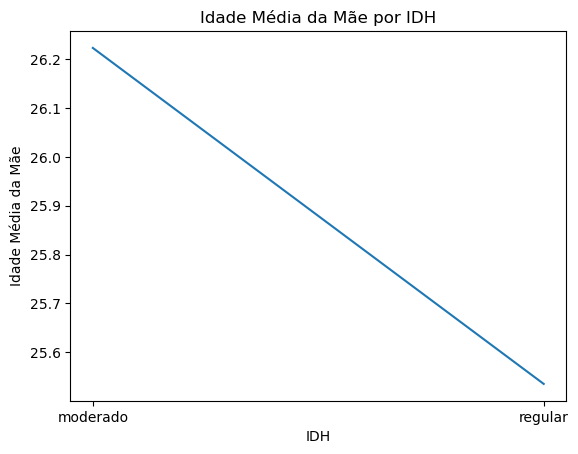

In [482]:

regioes_map = dict(zip(dados_ro['municipio'], dados_ro['ifdm']))
regioes_map

sinasc['ifdm'] = sinasc['munResNome'].map(regioes_map)

sinasc_copy = sinasc.copy()

def classificar(idh):
    if idh < 0.4:
        return 'baixo'
    elif 0.4 <= idh < 0.6:
        return 'regular'
    elif 0.6 <= idh < 0.8:
        return 'moderado'
    elif idh > 0.9:
        return 'Alto'
            

sinasc_copy['ifdm'] = sinasc_copy['ifdm'].apply(classificar)
sinasc_copy


resultado = sinasc_copy.groupby('ifdm')['IDADEMAE'].agg('mean').reset_index()

sns.lineplot(data=resultado, x='ifdm', y='IDADEMAE')
plt.title('Idade Média da Mãe por IDH')
plt.xlabel('IDH')
plt.ylabel('Idade Média da Mãe')
plt.show()

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


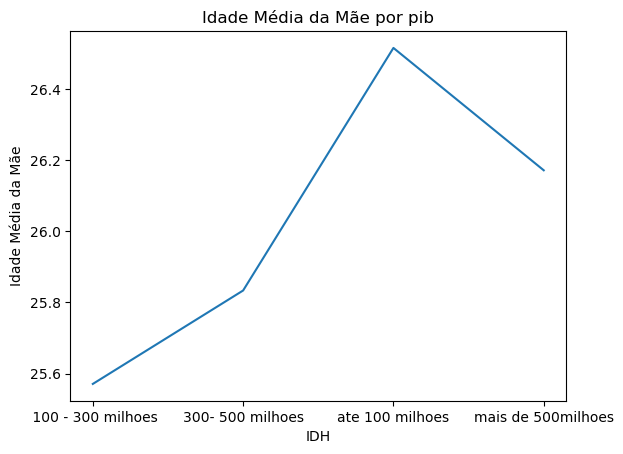

In [500]:

regioes_map = dict(zip(dados_ro['municipio'], dados_ro['pib']))
regioes_map

sinasc['pib'] = sinasc['munResNome'].map(regioes_map)

sinasc.head()

inasc_copy = sinasc.copy()

def classificar(pib):
    if pib < 100000:
        return 'ate 100 milhoes'
    elif 100000 <= pib < 300000:
        return ' 100 - 300 milhoes'
    elif 300000 <= pib < 500000 :
        return '300- 500 milhoes'
    elif pib > 500000:
        return 'mais de 500milhoes'

sinasc_copy['pib'] = sinasc_copy['pib'].apply(classificar)
sinasc_copy


resultado = sinasc_copy.groupby('pib')['IDADEMAE'].agg('mean').reset_index()

sns.lineplot(data=resultado, x='pib', y='IDADEMAE')
plt.title('Idade Média da Mãe por pib')
plt.xlabel('IDH')
plt.ylabel('Idade Média da Mãe')
plt.show()

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

>> Primeiramente, irei pedir desculpas. hoje estou com tempo meio contado e tive que fazer uma analise mais "crua" sobre o assunto.

# PONTO 1 
# Por cima, vemos que o ifdm e o idh se comportam da mesma forma, ambos quanto maior o idh ou ifdm mais idade em media tem as maes.

# PONTO 2 
# Diferente do ifdm e do idh, o pib mostra um comportamento diferente , em media de 100 a 300m as maes sao mais novas.
# de ate 100m as maes sao mais velhas, e acima de 500m a media tbm fica acima.